X_train:  (37, 1)
y_train:  (37,)
X_test:  (13, 1)
y_test:  (13,)
------------------------------------
Ordinary Least Squares
Prediction Shape:  (13,)
Coefficients: 
 [ 0.5192848]
Mean squared error: 1.69
Variance score: 0.70


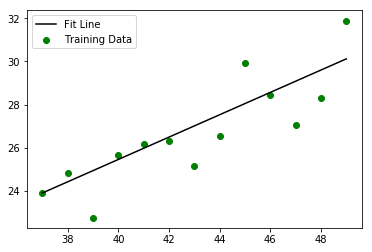

------------------------------------
Ridge Regression
Ridge Coefficient:  [ 0.51927249]
Ridge Intercept:  4.67629565898
------------------------------------
Lasso
Lasso Coefficient:  [ 0.51840761]
Lasso Intercept:  4.69186353707


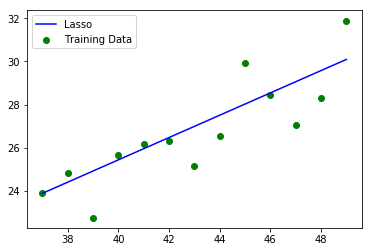

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#creating data with random noise
x=np.arange(50)

delta=np.random.uniform(-2.5,2.5, size=(50))
np.random.shuffle(delta)
y =0.5*x+5+delta

#arranging data into 2x50 matrix
a=np.array(x) #inputs
b=np.array(y) #outputs

#Split into training and test
X_train=a[:37, np.newaxis]
X_test=a[37:, np.newaxis]
y_train=b[:37]
y_test=b[37:]

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print ("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

print ("------------------------------------")

print ("Ordinary Least Squares")
#Add Ordinary Least Squares fit
reg=LinearRegression()
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
print ("Prediction Shape: ", pred.shape)

print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

#plot
plt.scatter(X_test,y_test,color='green', label="Training Data")
plt.plot(X_test, pred, color='black', label="Fit Line")
plt.legend()
plt.show()

print ("------------------------------------")

print ("Ridge Regression")

ridge=linear_model.RidgeCV(alphas=[0.1,1.0,10.0])
ridge.fit(X_train,y_train)
print ("Ridge Coefficient: ",ridge.coef_)
print ("Ridge Intercept: ", ridge.intercept_)
#Look into graphing with Ridge fit

print ("------------------------------------")

print ("Lasso")
lasso=linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
predl=lasso.predict(X_test)
print("Lasso Coefficient: ", lasso.coef_)
print("Lasso Intercept: ", lasso.intercept_)
plt.scatter(X_test,y_test,color='green', label="Training Data")
plt.plot(X_test, predl, color='blue', label="Lasso")
plt.legend()
plt.show()